In [26]:
cd workspace/voxel/

/home/naveen/workspace/voxel


In [48]:
import os

def get_unique_labels_and_counts(labels_folder):
    label_counts = {}

    try:
        # Iterate through each .txt file in the labels folder
        for txt_file in os.listdir(labels_folder):
            if txt_file.endswith(".txt"):
                # Read the content of the .txt file
                with open(os.path.join(labels_folder, txt_file), 'r') as file:
                    # Read lines and split each line to get labels
                    labels = [line.strip().split()[0] for line in file.readlines() if line.strip()]

                    # Update label counts
                    for label in labels:
                        label_counts[label] = label_counts.get(label, 0) + 1
    except Exception as e:
        print(f"An error occurred: {e}")
        return {}, 0

    return label_counts, len(label_counts)
# /home/naveen/workspace/voxel/
labels_folder = "Pipline_workspace/data/SURENDAR/PYLON/20231003/FEB-TOP02-LANCO/2023-10-03_15-19-29 _ Annotation"

# Get unique labels and counts from all label files in the folder
unique_labels_counts, total_samples = get_unique_labels_and_counts(labels_folder)

# Print unique labels and their counts
print("Unique Labels and Counts:")
for label, count in unique_labels_counts.items():
    print(f"{label}: {count} occurrences")

print(f"\nTotal Unique Labels Count: {len(unique_labels_counts)}")
print(f"Total Samples: {total_samples}")


Unique Labels and Counts:
5: 383 occurrences

Total Unique Labels Count: 1
Total Samples: 1


In [6]:
# Pipline_workspace/data/SURENDAR/01082023/2023-09-12_17-22-13 _ Annotation
# data/SURENDAR/01082023/2023-09-12_17-22-13 _ Annotation

!cat Pipline_workspace/data/SURENDAR/01082023/2023-09-12_17-22-13_Annotation

cat: Pipline_workspace/data/SURENDAR/01082023/2023-09-12_17-22-13_Annotation: No such file or directory


/home/naveen


{'7', '3', '2', '0', '6', '8', '1'}


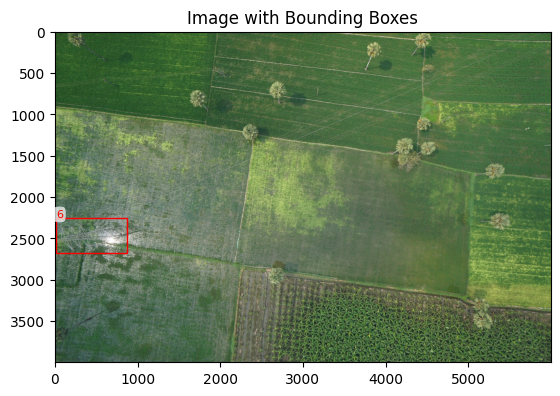

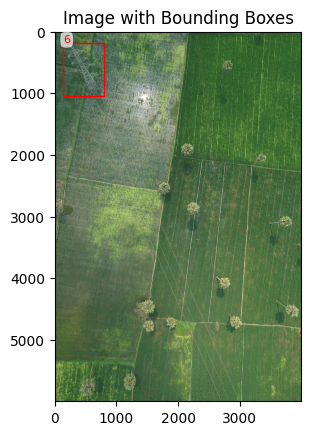

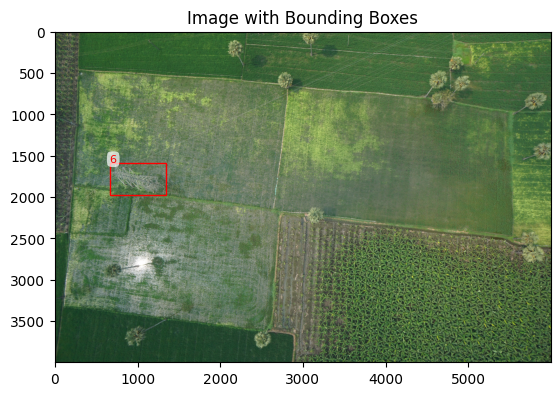

In [30]:
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def get_unique_labels_from_folder(labels_folder):
    all_labels = set()

    # Iterate through each .txt file in the labels folder
    for txt_file in os.listdir(labels_folder):
        if txt_file.endswith(".txt"):
            # Read the content of the .txt file
            with open(os.path.join(labels_folder, txt_file), 'r') as file:
                # Read lines and split each line to get labels
                labels = [line.strip().split()[0] for line in file.readlines() if line.strip()]

                # Add labels to the set
                all_labels.update(labels)

    return all_labels
    
def get_labels_from_file(labels_file):
    with open(labels_file, 'r') as file:
        labels_content = file.read()

    # Extract labels and bounding box coordinates from YOLO format
    labels = [label.split() for label in labels_content.split('\n') if label]
    return labels

def plot_image_with_boxes(image_path, boxes, class_names):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1)
    ax.imshow(img_rgb)

    for box in boxes:
        class_id, x_center, y_center, width, height = map(float, box)
        x, y, w, h = (
            x_center - width / 2,
            y_center - height / 2,
            width,
            height
        )

        # Create a Rectangle patch
        rect = patches.Rectangle(
            (x * img.shape[1], y * img.shape[0]),
            w * img.shape[1],
            h * img.shape[0],
            linewidth=1,
            edgecolor='r',
            facecolor='none'
        )

        # Add the patch to the Axes
        ax.add_patch(rect)

        # Add class label near the bounding box
        class_index = int(class_id)
        if 0 <= class_index < len(class_names):
            class_name = class_names[class_index]
            plt.text(
                x * img.shape[1],
                y * img.shape[0] - 5,
                f"{class_name}",
                color='r',
                fontsize=8,
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round4')
            )

    plt.title("Image with Bounding Boxes")
    plt.show()

def plot_images_for_label(labels_folder, images_folder, label_to_plot):
    # Create class names based on unique labels
    class_names = [str(label) for label in range(len(unique_labels))]

    # Iterate through each .txt file in the labels folder
    for txt_file in os.listdir(labels_folder):
        if txt_file.endswith(".txt"):
            image_name = os.path.splitext(txt_file)[0]

            # Read the content of the .txt file
            labels_content = get_labels_from_file(os.path.join(labels_folder, txt_file))

            # Extract labels and bounding boxes for the specified label
            boxes = [box for box in labels_content if box[0] == label_to_plot]

            if boxes:
                # Load and plot the corresponding image with bounding boxes
                image_path = os.path.join(images_folder, f"{image_name}.JPG")
                plot_image_with_boxes(image_path, boxes, class_names)

# Path to the folder containing labels in YOLO format
labels_folder = "Pipline_workspace/data/SURENDAR/27072023/2023-09-11_10-16-36 _ Annotation"

# Path to the folder containing images
images_folder = "Pipline_workspace/data/SURENDAR/27072023/images"

# Get unique labels from all label files in the folder
unique_labels = get_unique_labels_from_folder(labels_folder)
print(unique_labels)

# Plot images with bounding boxes for the unique label "9"
label_to_plot = "6"
plot_images_for_label(labels_folder, images_folder, label_to_plot)


In [51]:
import os
from PIL import Image

def yolo_to_kitti(yolo_annotation, class_mapping, image_width, image_height):
    class_index, x_center, y_center, width, height = map(float, yolo_annotation.split())
    
    x1 = int((x_center - width / 2) * image_width)
    y1 = int((y_center - height / 2) * image_height)
    x2 = int((x_center + width / 2) * image_width)
    y2 = int((y_center + height / 2) * image_height)
    
    kitti_class = class_mapping[str(int(class_index))]
    
    return f"{kitti_class} 0.00 0 0.00 {x1} {y1} {x2} {y2} 0 0 0 0 0 0 0 1"

def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
        return width, height
    except (IOError, ValueError) as e:
        error_msg = f"Unable to read image dimensions for {image_path}: {str(e)}"
        raise ValueError(error_msg)

def convert_folder(yolo_folder, image_folder, output_folder, class_mapping, log_file_path):
    os.makedirs(output_folder, exist_ok=True)

    skipped_files = []

    for filename in os.listdir(yolo_folder):
        if filename.endswith(".txt"):
            yolo_path = os.path.join(yolo_folder, filename)
            image_filename = os.path.splitext(filename)[0] + ".JPG"
            image_path = os.path.join(image_folder, image_filename)

            if not os.path.exists(image_path) or not os.path.exists(yolo_path):
                skipped_msg = f"Skipped: Image or annotation file missing for {filename}\n" \
                              f"Image Path: {image_path}\nAnnotation Path: {yolo_path}"
                print(skipped_msg)
                skipped_files.append(skipped_msg)
                continue

            try:
                image_width, image_height = get_image_dimensions(image_path)
            except ValueError as e:
                skipped_msg = f"Skipped: {str(e)}\n" \
                              f"Image Path: {image_path}\nAnnotation Path: {yolo_path}"
                print(skipped_msg)
                skipped_files.append(skipped_msg)
                continue

            with open(yolo_path, "r") as yolo_file:
                yolo_annotations = yolo_file.readlines()

            kitti_annotations = []
            for yolo_annotation in yolo_annotations:
                kitti_annotation = yolo_to_kitti(yolo_annotation.strip(), class_mapping, image_width, image_height)
                kitti_annotations.append(kitti_annotation)

            output_filename = os.path.splitext(filename)[0] + ".txt"
            output_path = os.path.join(output_folder, output_filename)

            with open(output_path, "w") as kitti_file:
                kitti_file.write("\n".join(kitti_annotations))

            print(f"Conversion completed for {filename} -> {output_filename}")

    if skipped_files:
        with open(log_file_path, "a") as log_file:
            log_file.write("\n".join(skipped_files))
            print(f"Skipped files logged to {log_file_path}")

# Rest of your code remains unchanged

# Call the convert_folder function
yolo_folder_path = "Pipline_workspace/data/SURENDAR/PYLON/20231006/2023-10-06_19-36-13 _ Annotation"
image_folder_path = "Pipline_workspace/data/SURENDAR/PYLON/20231006/images"
output_folder_path = "Pipline_workspace/data/SURENDAR/PYLON/20231006/kitti_data"
class_mapping = {"0": "ELECTRIC_POLES", "1": "TREES", "2": "TEMPORARY_STRUCTURES", "3": "PERMENANT_STRUCTURES", "4": "SOLAR",
                 "5": "PYLON", "6": "WELL", "7": "TLP"} 
log_file_path = "Pipline_workspace/data/skipped_files_log.txt"

convert_folder(yolo_folder_path, image_folder_path, output_folder_path, class_mapping, log_file_path)


Conversion completed for F1_DSC00077.txt -> F1_DSC00077.txt
Conversion completed for F2_DSC00493.txt -> F2_DSC00493.txt
Conversion completed for F2_DSC00297.txt -> F2_DSC00297.txt
Skipped: Image or annotation file missing for F4_DSC00813.txt
Image Path: Pipline_workspace/data/SURENDAR/PYLON/20231006/images/F4_DSC00813.JPG
Annotation Path: Pipline_workspace/data/SURENDAR/PYLON/20231006/2023-10-06_19-36-13 _ Annotation/F4_DSC00813.txt
Conversion completed for F2_DSC01064.txt -> F2_DSC01064.txt
Conversion completed for F1_DSC00723.txt -> F1_DSC00723.txt
Skipped: Image or annotation file missing for F4_DSC00164.txt
Image Path: Pipline_workspace/data/SURENDAR/PYLON/20231006/images/F4_DSC00164.JPG
Annotation Path: Pipline_workspace/data/SURENDAR/PYLON/20231006/2023-10-06_19-36-13 _ Annotation/F4_DSC00164.txt
Skipped: Image or annotation file missing for F3_DSC01041.txt
Image Path: Pipline_workspace/data/SURENDAR/PYLON/20231006/images/F3_DSC01041.JPG
Annotation Path: Pipline_workspace/data/SU

In [33]:
import os
from PIL import Image

def yolo_to_kitti(yolo_annotation, class_mapping, image_width, image_height):
    class_index, x_center, y_center, width, height = map(float, yolo_annotation.split())
    
    x1 = int((x_center - width / 2) * image_width)
    y1 = int((y_center - height / 2) * image_height)
    x2 = int((x_center + width / 2) * image_width)
    y2 = int((y_center + height / 2) * image_height)
    
    kitti_class = class_mapping[str(int(class_index))]
    
    return f"{kitti_class} 0.00 0 0.00 {x1} {y1} {x2} {y2} 0 0 0 0 0 0 0 1"

def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
        return width, height
    except Exception as e:
        raise ValueError(f"Unable to read image dimensions for {image_path}: {str(e)}")

def convert_folder(yolo_folder, image_folder, output_folder, class_mapping, log_file_path):
    os.makedirs(output_folder, exist_ok=True)

    skipped_files = []

    for filename in os.listdir(yolo_folder):
        if filename.endswith(".txt"):
            yolo_path = os.path.join(yolo_folder, filename)
            image_filename = os.path.splitext(filename)[0] + ".JPG"
            image_path = os.path.join(image_folder, image_filename)

            if not os.path.exists(yolo_path):
                skipped_msg = f"Skipped: Image or annotation file missing for {filename}\n" \
                              f"Image Path: {image_path}\nAnnotation Path: {yolo_path}"
                print(skipped_msg)
                skipped_files.append(skipped_msg)
                continue

            with open(yolo_path, "r") as yolo_file:
                yolo_annotations = yolo_file.readlines()

            image_width, image_height = get_image_dimensions(image_path)

            kitti_annotations = []
            for yolo_annotation in yolo_annotations:
                kitti_annotation = yolo_to_kitti(yolo_annotation.strip(), class_mapping, image_width, image_height)
                kitti_annotations.append(kitti_annotation)

            output_filename = os.path.splitext(filename)[0] + ".txt"
            output_path = os.path.join(output_folder, output_filename)

            with open(output_path, "w") as kitti_file:
                kitti_file.write("\n".join(kitti_annotations))

            print(f"Conversion completed for {filename} -> {output_filename}")

    if skipped_files:
        with open(log_file_path, "a") as log_file:
            log_file.write("\n".join(skipped_files))
            print(f"Skipped files logged to {log_file_path}")

yolo_folder_path = "Pipline_workspace/data/SURENDAR/28072023/2023-09-08_17-51-36 _ Annotation"
image_folder_path = "Pipline_workspace/data/SURENDAR/28072023/images"
output_folder_path = "Pipline_workspace/data/SURENDAR/28072023/kitti_data"
class_mapping = {"0": "ELECTRIC_POLES", "1": "TREES", "2": "TEMPORARY_STRUCTURES", "3": "PERMENANT_STRUCTURES", "4": "CP",
                 "5": "SOLAR", "6": "PYLON", "7": "WELL", "8": "TLP", "9": "MARKER"} 
log_file_path = "Pipline_workspace/data/skipped_files_log.txt"

convert_folder(yolo_folder_path, image_folder_path, output_folder_path, class_mapping, log_file_path)


Conversion completed for DSC00402.txt -> DSC00402.txt
Conversion completed for DSC00401.txt -> DSC00401.txt
Conversion completed for DSC00421.txt -> DSC00421.txt
Conversion completed for DSC00426.txt -> DSC00426.txt
Conversion completed for DSC00417.txt -> DSC00417.txt
Conversion completed for DSC00422.txt -> DSC00422.txt
Conversion completed for DSC00400.txt -> DSC00400.txt
Conversion completed for DSC00403.txt -> DSC00403.txt
Conversion completed for DSC00418.txt -> DSC00418.txt
Conversion completed for DSC00425.txt -> DSC00425.txt
Conversion completed for DSC00424.txt -> DSC00424.txt
Conversion completed for DSC00427.txt -> DSC00427.txt
Conversion completed for DSC00430.txt -> DSC00430.txt
Conversion completed for DSC00429.txt -> DSC00429.txt
Conversion completed for DSC00428.txt -> DSC00428.txt
Conversion completed for DSC00420.txt -> DSC00420.txt
Conversion completed for DSC00419.txt -> DSC00419.txt
Conversion completed for DSC00423.txt -> DSC00423.txt
Conversion completed for DSC

In [28]:
import os
from PIL import Image

def yolo_to_kitti(yolo_annotation, class_mapping, image_width, image_height):
    class_index, x_center, y_center, width, height = map(float, yolo_annotation.split())
    
    x1 = int((x_center - width / 2) * image_width)
    y1 = int((y_center - height / 2) * image_height)
    x2 = int((x_center + width / 2) * image_width)
    y2 = int((y_center + height / 2) * image_height)
    
    kitti_class = class_mapping[str(int(class_index))]
    
    return f"{kitti_class} 0.00 0 0.00 {x1} {y1} {x2} {y2} 0 0 0 0 0 0 0 1"

def get_image_dimensions(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
        return width, height
    except Exception as e:
        raise ValueError(f"Unable to read image dimensions for {image_path}: {str(e)}")

def convert_folder(yolo_folder, image_folder, output_folder, class_mapping, log_file_path):
    os.makedirs(output_folder, exist_ok=True)

    skipped_files = []

    for filename in os.listdir(yolo_folder):
        if filename.endswith(".txt"):
            yolo_path = os.path.join(yolo_folder, filename)
            image_filename = os.path.splitext(filename)[0] + ".JPG"
            image_path = os.path.join(image_folder, image_filename)

            if not os.path.exists(image_path) or not os.path.exists(yolo_path):
                skipped_msg = f"Skipped: Image or annotation file missing for {filename}\n" \
                              f"Image Path: {image_path}\nAnnotation Path: {yolo_path}"
                print(skipped_msg)
                skipped_files.append(skipped_msg)
                continue

            with open(yolo_path, "r") as yolo_file:
                yolo_annotations = yolo_file.readlines()

            image_width, image_height = get_image_dimensions(image_path)

            kitti_annotations = []
            for yolo_annotation in yolo_annotations:
                kitti_annotation = yolo_to_kitti(yolo_annotation.strip(), class_mapping, image_width, image_height)
                kitti_annotations.append(kitti_annotation)

            output_filename = os.path.splitext(filename)[0] + ".txt"
            output_path = os.path.join(output_folder, output_filename)

            with open(output_path, "w") as kitti_file:
                kitti_file.write("\n".join(kitti_annotations))

            print(f"Conversion completed for {filename} -> {output_filename}")

    if skipped_files:
        with open(log_file_path, "a") as log_file:
            log_file.write("\n".join(skipped_files))
            print(f"Skipped files logged to {log_file_path}")

yolo_folder_path = "Pipline_workspace/data/SURENDAR/25072023/labels_my-project-name_2023-08-30-04-48-15"
image_folder_path = "Pipline_workspace/data/SURENDAR/25072023/images"
output_folder_path = "Pipline_workspace/data/SURENDAR/25072023/kitti_data"
class_mapping = {"0": "ELECTRIC_POLES", "1": "TREES", "2": "TEMPORARY_STRUCTURES", "3": "PERMENANT_STRUCTURES","4": "NALA",
                 "5": "ROADS", "6": "CP", "7": "SOLAR", "8": "RAILWAY", "9": "PYLON", "10": "WELL", "11": "TLP", "12": "MARKER"} 
log_file_path = "Pipline_workspace/data/skipped_files_log.txt"

convert_folder(yolo_folder_path, image_folder_path, output_folder_path, class_mapping, log_file_path)


Conversion completed for DSC00037.txt -> DSC00037.txt
Conversion completed for DSC00273.txt -> DSC00273.txt
Conversion completed for DSC00059.txt -> DSC00059.txt
Conversion completed for DSC00186.txt -> DSC00186.txt
Conversion completed for DSC00161.txt -> DSC00161.txt
Conversion completed for DSC00267.txt -> DSC00267.txt
Conversion completed for DSC00041.txt -> DSC00041.txt
Conversion completed for DSC00286.txt -> DSC00286.txt
Conversion completed for DSC00271.txt -> DSC00271.txt
Conversion completed for DSC00049.txt -> DSC00049.txt
Conversion completed for DSC00214.txt -> DSC00214.txt
Conversion completed for DSC00222.txt -> DSC00222.txt
Conversion completed for DSC00072.txt -> DSC00072.txt
Conversion completed for DSC00168.txt -> DSC00168.txt
Conversion completed for DSC00283.txt -> DSC00283.txt
Conversion completed for DSC00285.txt -> DSC00285.txt
Conversion completed for DSC00268.txt -> DSC00268.txt
Conversion completed for DSC00198.txt -> DSC00198.txt
Conversion completed for DSC